In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import tensor
from utils import add_ones, make_tensor, minmax_scale, t_type

%matplotlib inline

In [2]:
df = sns.load_dataset("iris")
df["class"] = df.species.apply(lambda x: 1 if x=='setosa' else 0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,class
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [3]:
X = df[df.columns[:3]].values
y = df["class"].values
y = y.reshape(-1,1)

Sigmoid function $$\sigma{(z)} = \frac{1}{1+e^{-z}}$$
Hypothesis function $$h_\theta (x^{(i)}) = \sigma (\langle \theta, x^{(i)} \rangle)$$

Update rule: for $j = 1, \dots , d$
$$\theta_j(t+1)= \theta_j(t) + \alpha \cdot gradient_j$$
$$gradient_j = \sum_{i=1}^N (y^{(i)} - \alpha(\langle \theta, x^{(i)}\rangle)) x_j^{(i)}$$

$$
\begin{align}
gradient =
\begin{bmatrix}
gradient_1 \\ gradient_2 \\ \vdots \\ gradient_N
\end{bmatrix} 
&= 
\begin{bmatrix}
x^{(1)} \\ x^{(2)} \\ \vdots \\ x^{(N)}
\end{bmatrix}^{\mathbf{T}}
\Bigg(
\begin{bmatrix}
y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(N)}
\end{bmatrix} - \sigma \bigg(
\begin{bmatrix}
x^{(1)} \\ x^{(2)} \\ \vdots \\ x^{(N)}
\end{bmatrix}
\begin{bmatrix}
\theta_1 \\ \theta_2 \\ \vdots \\ \theta_d
\end{bmatrix}
\bigg)
\Bigg) \\
gradient &= X^\mathbf{T} (y - \sigma (X \theta))
\end{align}
$$

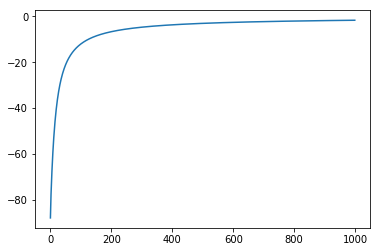

In [6]:
def sigmoid(z):
    # z: torch.float64
    return 1/(1+torch.exp(-z))

def gradient(X, y, theta):
    z = X@theta
    return X.t()@(y - sigmoid(z))

def log_likelihood(X, y, theta):
    z = X@theta
    return y.t()@torch.log(sigmoid(z)) + (1-y).t()@torch.log(sigmoid(-z))

def logistic_regression_function(X, y, n_iter = 1000, step_size = 0.01):
    X, y = make_tensor(X, y)
    X = minmax_scale(add_ones(X))
    y = y.reshape(-1, 1)
    
    N, d = X.shape
    theta = torch.zeros((d,1), dtype=t_type)
    ll = []
    theta_list = []
    for i in range(n_iter):
        grad = gradient(X, y, theta)
        # update theta via gradient ascent
        # maximise log likelihood
        theta = theta + step_size * grad
        ll.append(log_likelihood(X,y,theta).item())
        theta_list.append(theta)
    return theta, ll, theta_list

theta, ll, theta_list = logistic_regression_function(X, y, n_iter=1000)
plt.plot(ll)

In [20]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
y = df.species

In [33]:
k = 'setosa'
y_k = y.apply(lambda x: 1 if x==k else 0)
y_k = make_tensor(y_k.values)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=torch.float64)

In [112]:
class LogisticRegression:
    def __init__(self, alpha=0.01, max_iter=1000, fit_intercept=True):
        self.alpha = alpha # learning rate
        self.max_iter = max_iter
        self.__fit_intercept = fit_intercept
        self.loss_history = []
        self.theta_history = []
        
    def __sigmoid(self, z):
        # z: torch.float64
        return 1/(1+torch.exp(-z))

    def __gradient(self, X, y, theta):
        z = X@theta
        return X.t()@(y - self.__sigmoid(z))

    def log_likelihood(self, X, y, theta):
        z = X@theta
        return y.t()@torch.log(self.__sigmoid(z)) + (1-y).t()@torch.log(self.__sigmoid(-z))
    
    def fit(self, X,y):
        """
        X: (N, d) matrix (iterable)
        y: (N, 1) column vector (iterable)
        """
        X, y = make_tensor(X, y)
        assert X.shape[0] == y.shape[0], "Dimensions must fit"
        X = minmax_scale(X) # scale
        if self.__fit_intercept:
            X = add_ones(X)
        N, d = X.shape
        
        theta = torch.zeros((d,1), dtype=t_type) # initialize gradient
        # reset history
        self.loss_history.clear()
        self.theta_history.clear()
        for i in range(self.max_iter):
            grad = self.__gradient(X, y, theta)
            # update theta via gradient ascent
            # maximise log likelihood
            theta = theta + self.alpha * grad
            self.loss_history.append(-self.log_likelihood(X,y,theta).item())
            self.theta_history.append(theta)    
        self.theta = theta

In [113]:
lm = LogisticRegression()

In [117]:
y = y.apply(lambda x: 1 if x=='setosa' else 0).values.reshape(-1,1)
lm.fit(X, y)

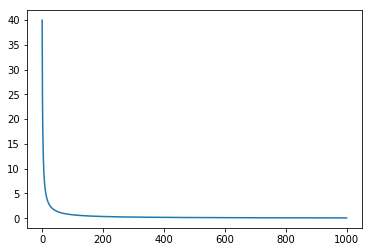

In [118]:
plt.plot(lm.loss_history)